# **07 EDA and Hypotheses tests**

## Objectives

* Continue EDA to support Hypotheses tests 

## Inputs

* housing_cleaned.csv

## Outputs

* housing_cleaned_for_model.csv

---

# EDA

Load libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

In [6]:
# read the cleaned data
df = pd.read_csv('../data/clean/housing_cleaned.csv')

Hypothesis 1: The property type has an effect on the price per square metre: Detached houses have a higher price per square metre than semi-detached, which are higher than terraced, which are higher than flats. This will be validated using visualizations and statistical (ANOVA and Tukey) tests.


In [7]:
# what are the prices by property_type?
df.groupby('property_type')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
D,2020.0,412192.806931,147956.450639,79000.0,307500.0,381625.0,485000.0,948500.0
F,579.0,166347.758204,70730.452431,77000.0,118500.0,148000.0,193750.0,550000.0
S,2819.0,259716.959915,90069.054081,77000.0,200000.0,247500.0,297872.5,844000.0
T,1830.0,218775.764481,82111.530250,75500.0,167500.0,205000.0,252500.0,940000.0


Note: There is an order to the price by property_type with flats being the cheapest and detached houses the most expensive

In [15]:
# create a new column for order of property types by from 1 for Flats to 4 for Detached houses
property_type_order = {
    'F': 1,
    'T': 2,
    'S': 3,
    'D': 4
}
df['property_type_order'] = df['property_type'].map(property_type_order)
df['property_type_order'].value_counts()
# calculate the mean price by property_type 
mean_prices = df.groupby('property_type')['price'].mean().sort_values()
mean_prices = mean_prices.apply(lambda x: f"{x:,.0f}") # separate thousands with commas and round to nearest integer - used Copilot inline helper
mean_prices

property_type
F    166,348
T    218,776
S    259,717
D    412,193
Name: price, dtype: object

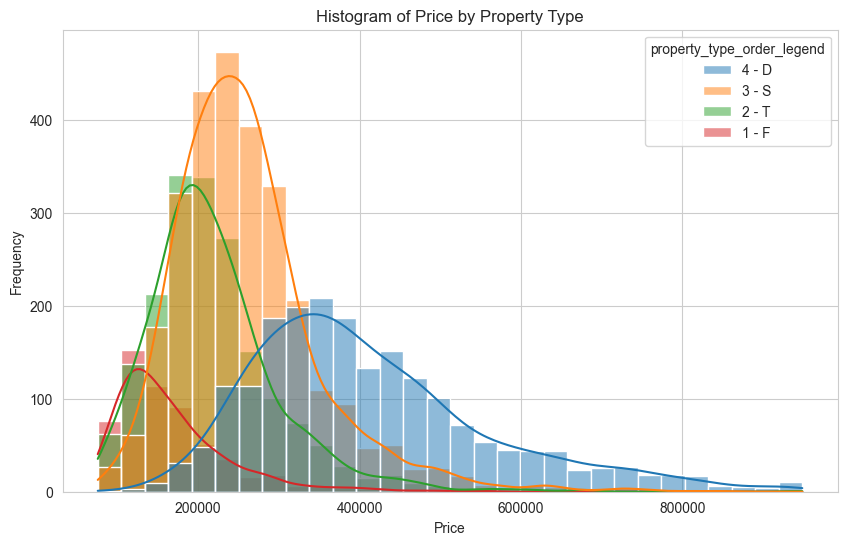

In [18]:
# plot histogram of price distribution of property_type
# set the legend labels to the property_type concatenated with the property_type_order
df['property_type_order_legend'] = df['property_type_order'].astype(str) + ' - ' + df['property_type']
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='property_type_order_legend', bins=30, alpha=0.5, kde=True)
plt.title('Histogram of Price by Property Type')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
# drop intermediate columns used for plotting
df = df.drop(columns=['property_type_order_legend'])

The general order of the prices by property type can be seen clearly in this histogram.

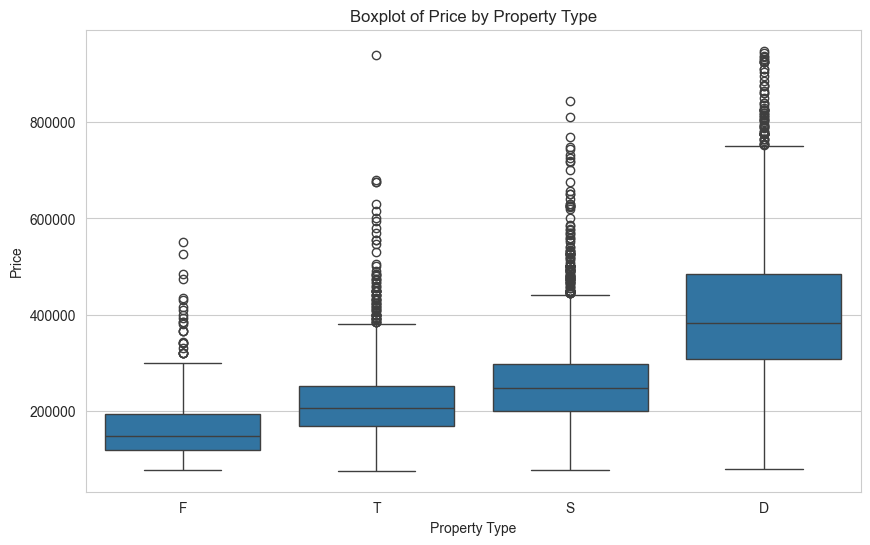

In [19]:
# plot boxplot of price by property_type sorted by property_type_order
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='property_type', y='price', order=mean_prices.index)
plt.title('Boxplot of Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

In [ ]:
# Is the difference in price by property type statistically significant?
# Null hypothesis: There is no difference in prices between property types
# Alternative hypothesis: There is a difference in prices between property types

import scipy.stats as stats
# ANOVA test
f_val, p_val = stats.f_oneway(
    df[df['property_type'] == 'F']['price'],
    df[df['property_type'] == 'T']['price'],
    df[df['property_type'] == 'S']['price'],
    df[df['property_type'] == 'D']['price']
)
print(f"ANOVA test: F-value = {f_val}, p-value = {p_val}")



ANOVA test: F-value = 1486.5637326865171, p-value = 0.0


---

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in prices between at least two property types.

In [29]:
# As we have multiple property types, we can use Tukey's HSD to find out which property types are different
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['price'], groups=df['property_type'], alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
     D      F -245845.0487   0.0 -258754.9343 -232935.1631   True
     D      S  -152475.847   0.0 -160459.2639 -144492.4301   True
     D      T -193417.0424   0.0 -202255.2329  -184578.852   True
     F      S   93369.2017   0.0   80873.5449  105864.8585   True
     F      T   52428.0063   0.0   39369.6716   65486.3409   True
     S      T  -40941.1954   0.0  -49162.5033  -32719.8876   True
-----------------------------------------------------------------


All pairwise comparisons are significant i.e. All property types have significantly different prices from each other
We therefore reject the null hypothesis for all group comparisons and conclude that there is a statistically significant difference between all property types.

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---